In [473]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [474]:
mydata = pd.read_csv('Data_2019/ChurnData.csv')

In [475]:
mydata.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11,33,7,136,5,5,0,1,1,4.40,...,1,0,1,1,0,1.482,3.033,4.913,4,1
1,33,33,12,33,2,0,0,0,0,9.45,...,0,0,0,0,0,2.246,3.240,3.497,1,1
2,23,30,9,30,1,2,0,0,0,6.30,...,0,0,0,1,0,1.841,3.240,3.401,3,0
3,38,35,5,76,2,10,1,1,1,6.05,...,1,1,1,1,1,1.800,3.807,4.331,4,0
4,7,35,14,80,2,15,0,1,0,7.10,...,0,0,1,1,0,1.960,3.091,4.382,3,0


In [476]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 28 columns):
tenure      200 non-null int64
age         200 non-null int64
address     200 non-null int64
income      200 non-null int64
ed          200 non-null int64
employ      200 non-null int64
equip       200 non-null int64
callcard    200 non-null int64
wireless    200 non-null int64
longmon     200 non-null float64
tollmon     200 non-null float64
equipmon    200 non-null float64
cardmon     200 non-null float64
wiremon     200 non-null float64
longten     200 non-null float64
tollten     200 non-null float64
cardten     200 non-null float64
voice       200 non-null int64
pager       200 non-null int64
internet    200 non-null int64
callwait    200 non-null int64
confer      200 non-null int64
ebill       200 non-null int64
loglong     200 non-null float64
logtoll     200 non-null float64
lninc       200 non-null float64
custcat     200 non-null int64
churn       200 non-null int64
dtype

In [477]:
mydata.shape

(200, 28)

In [478]:
x_input=mydata.loc[:,['tenure','age','address','income','ed','employ','equip','callcard','callwait']]

In [479]:
y_output = mydata.churn

In [480]:
#converting pandas into numpy array
xa = np.asanyarray(x_input)
ya = np.asanyarray(y_output)

# using as any array beacause np.array strictly converts the series into integer array only whereas as any array makes it flexible 
#  for array of any data type. 

In [481]:
xa [:3]

array([[ 11,  33,   7, 136,   5,   5,   0,   1,   1],
       [ 33,  33,  12,  33,   2,   0,   0,   0,   0],
       [ 23,  30,   9,  30,   1,   2,   0,   0,   0]], dtype=int64)

In [482]:
#Scaling the data beacause features are not numerically comparable yet.
from sklearn import preprocessing

In [483]:
xa = preprocessing.StandardScaler().fit(xa).transform(xa)

C:\Users\Shikhar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Shikhar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [484]:
x_mean = xa.mean()

In [485]:
x_std = xa.std()

In [486]:
print('mean of xa is {} and std of xa is {}'.format(abs(round(x_mean)),x_std))

mean of xa is 0.0 and std of xa is 1.0


## splitting data into train and test cases

In [487]:
from sklearn.model_selection import train_test_split

In [488]:
x_train,x_test,y_train,y_test = train_test_split(xa,ya,test_size=.30,random_state=101)
# random state is seed for random function (mod value) which gives the same values for each shuffle beacuse the mod is going to be same.
# In this case, 101.

## training using logistic regression


In [489]:
from sklearn.linear_model import LogisticRegression

In [490]:
trainer = LogisticRegression(solver='liblinear')

In [491]:
learner = trainer.fit(x_train,y_train)

In [492]:
# predicting values
yp = learner.predict(x_test)

#actual values corresponding to x test
ya = y_test

In [493]:
# predicting probability for how many times, the data will 0 and 1.
ypprob = learner.predict_proba(x_test)
ypprob[0]

array([0.63722981, 0.36277019])

In [494]:
# the ouput shown above shows probability of output being 0 and 1 in array format {ya = 0, ya = 1}

In [495]:
py0 = ypprob[:,0]
py1 = ypprob[:,1]
py0

array([0.63722981, 0.84423629, 0.97837776, 0.62123412, 0.91628125,
       0.69604592, 0.19487025, 0.84731056, 0.84921612, 0.87849853,
       0.46434302, 0.62086932, 0.53867504, 0.34721171, 0.92933349,
       0.47413405, 0.28603096, 0.49577612, 0.36227369, 0.73358408,
       0.3954677 , 0.8642223 , 0.93831875, 0.77858782, 0.86424359,
       0.92786397, 0.89385248, 0.77240819, 0.93904909, 0.64743811,
       0.95087588, 0.91717067, 0.54392233, 0.41144408, 0.92405266,
       0.31064378, 0.94629207, 0.84266261, 0.78372696, 0.79762597,
       0.38720598, 0.67930021, 0.708224  , 0.33907695, 0.92388784,
       0.77508224, 0.96734064, 0.98160911, 0.77944396, 0.19132229,
       0.65442431, 0.77322055, 0.53744908, 0.95757295, 0.91043787,
       0.87455313, 0.8530323 , 0.97026029, 0.33190305, 0.92915084])

probability of y being 1 for given x

In [496]:
table = pd.DataFrame({'P(y=0)':py0 , 'P(y=1)': py1})

In [497]:
table.head()

,P(y=0),P(y=1)
0,0.637230,0.362770
1,0.844236,0.155764
2,0.978378,0.021622
3,0.621234,0.378766
4,0.916281,0.083719


In [498]:
# getting mean square error 
from sklearn.metrics import mean_squared_error

In [499]:
np.sqrt(mean_squared_error(ya,yp))

0.4281744192888376

In [500]:
# getting accuracy score and jacard similarity score
from sklearn.metrics import accuracy_score,jaccard_similarity_score

In [501]:
jss = jaccard_similarity_score(ya,yp)
accs = accuracy_score(ya,yp)
'accuracy score is {} and jaccard similarity score is {}'.format(accs,jss)

'accuracy score is 0.8166666666666667 and jaccard similarity score is 0.8166666666666667'

## confusion matrix prediction

In [502]:
from sklearn.metrics import confusion_matrix, classification_report

In [503]:
myCM = confusion_matrix(ya,yp)
myCM
table= pd.DataFrame({'ya':ya , 'yp':yp})

In [504]:
C_CLASS = myCM[0,0] + myCM[1,1]
TS = myCM.sum()
C_CLASS/TS     #correct class to total score gives accuracy

0.8166666666666667

In [505]:
#confusion matrix 
Conmat = pd.crosstab(table.ya, table.yp, rownames=['Actual'], colnames=['Predicted'],margins='True')
Conmat

Predicted,0,1,All
Actual,,,
0,40,5,45
1,6,9,15
All,46,14,60


### the values are the frequencies or probabilities of occurence of each of TP, TN, FP, FN


<Figure size 576x576 with 0 Axes>

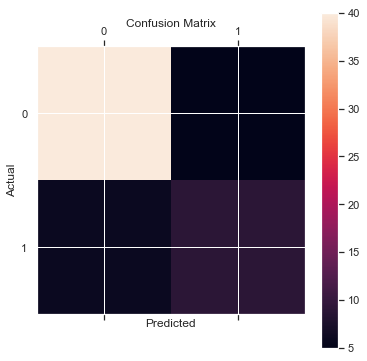

In [506]:
# heatmap using plt
plt.figure(figsize=(8,8))
plt.matshow(myCM)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## OR

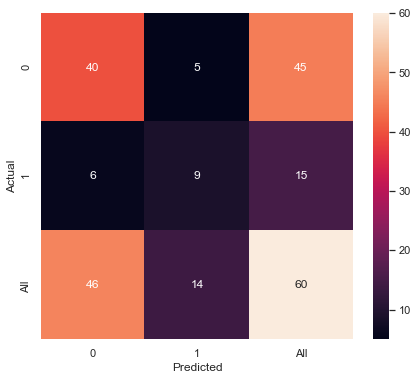

In [507]:
# heatmap using sns
import seaborn as sns 
sns.set(rc={'figure.figsize':(7,6)})
sns.heatmap(Conmat, annot=True)
plt.show()

In [508]:
MYCLASSREPORT = classification_report(ya,yp)
print(MYCLASSREPORT)

              precision    recall  f1-score   support

           0       0.87      0.89      0.88        45
           1       0.64      0.60      0.62        15

   micro avg       0.82      0.82      0.82        60
   macro avg       0.76      0.74      0.75        60
weighted avg       0.81      0.82      0.81        60



In [509]:
from sklearn.metrics import roc_curve, roc_auc_score

In [510]:
yppr = ypprob[:,1]
FPR, TPR, TH = roc_curve(ya,yppr)
FPR, TPR, TH 

(array([0.        , 0.        , 0.        , 0.02222222, 0.02222222,
        0.06666667, 0.06666667, 0.08888889, 0.08888889, 0.13333333,
        0.13333333, 0.22222222, 0.22222222, 0.33333333, 0.33333333,
        0.53333333, 0.53333333, 1.        ]),
 array([0.        , 0.06666667, 0.2       , 0.2       , 0.4       ,
        0.4       , 0.53333333, 0.53333333, 0.6       , 0.6       ,
        0.73333333, 0.73333333, 0.8       , 0.8       , 0.86666667,
        0.86666667, 1.        , 1.        ]),
 array([1.80867771, 0.80867771, 0.71396904, 0.68935622, 0.65278829,
        0.61279402, 0.58855592, 0.53565698, 0.52586595, 0.46255092,
        0.45607767, 0.35256189, 0.34557569, 0.22759181, 0.22677945,
        0.15078388, 0.1357777 , 0.01839089]))

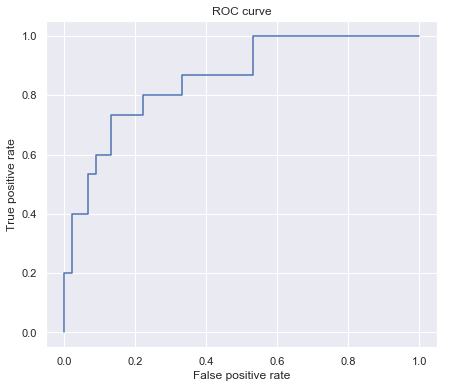

In [511]:
plt.plot(FPR,TPR,label='Roc curve')
plt.title('ROC curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()